# Analisi dei dati per IUM
### Mangini Dario, 2024-2025

### Importazione delle librerie e creazione dei dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
import plotly.express as px
import os
from folium.plugins import MarkerCluster

df_movies_clean = pd.read_csv('output/movies_clean.csv')
df_actors_clean = pd.read_csv('output/actors_clean.csv')
df_countries_clean = pd.read_csv('output/countries_clean.csv')
df_crew_clean = pd.read_csv('output/crew_clean.csv')
df_genres_clean = pd.read_csv('output/genres_clean.csv')
df_languages_clean = pd.read_csv('output/languages_clean.csv')
df_posters_clean = pd.read_csv('output/posters_clean.csv')
df_releases_clean = pd.read_csv('output/releases_clean.csv')
df_studios_clean = pd.read_csv('output/studios_clean.csv')
df_themes_clean = pd.read_csv('output/themes_clean.csv')

df_rotten_clean = pd.read_csv('output/rotten_tomatoes_reviews_clean.csv')
df_oscar_clean = pd.read_csv('output/the_oscar_awards_clean.csv')

# Analisi Statistica

# Quali fattori determinano il successo di uno studio cinematografico?

Questa sarà la domanda principale a cui saranno legate tutte le altre domande all'interno dell'analisi

Per iniziare, analizziamo quali studi hanno prodotto il maggior numero di film, poiché la quantità potrebbe essere un primo indicatore di successo.

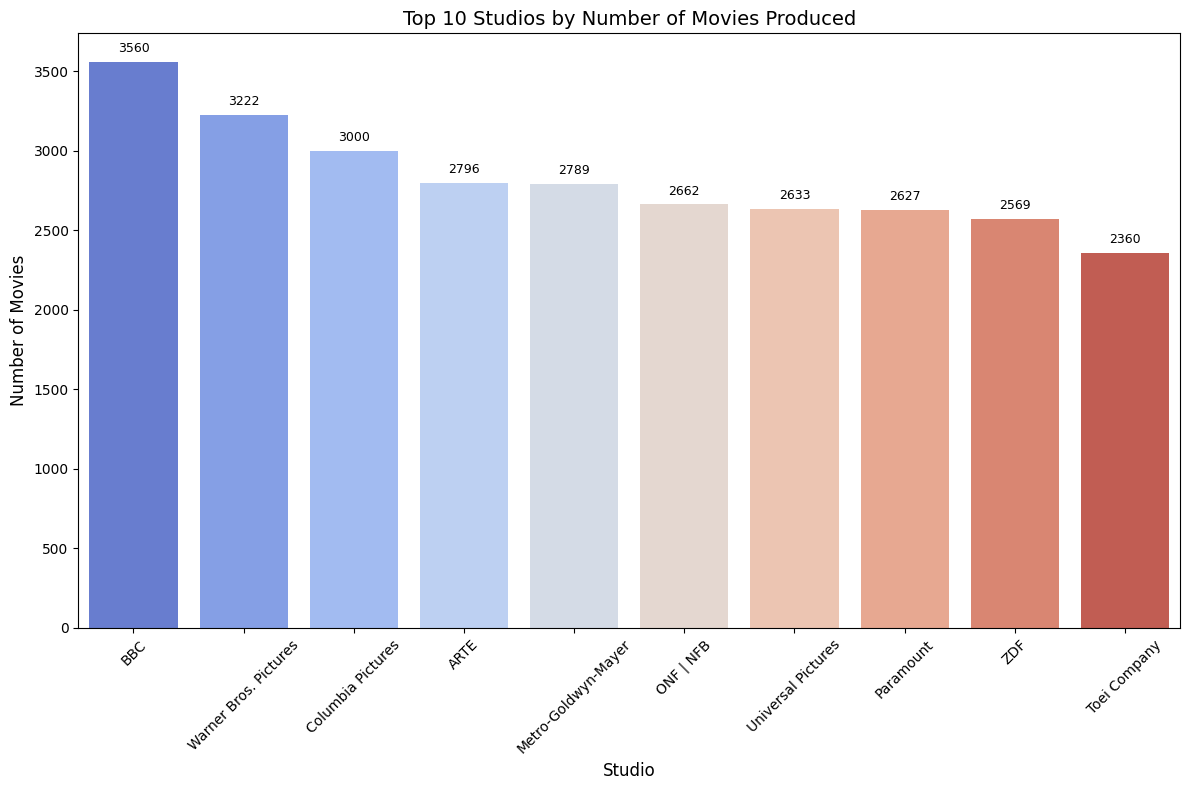

In [2]:
#  Contare il numero di film prodotti da ciascuno studio e selezionare i primi 10
top_studios = df_studios_clean['studio'].value_counts().nlargest(10).reset_index()
top_studios.columns = ['studio', 'movie_count']

# Creazione del barplot per visualizzare gli studios con il maggior numero di film prodotti
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='studio', y='movie_count', data=top_studios, hue='studio', palette='coolwarm', legend=False)

# Personalizzazione del grafico
plt.title('Top 10 Studios by Number of Movies Produced', fontsize=14)
plt.xlabel('Studio', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45)

# Annotazione delle barre con i valori numerici
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black',
                xytext=(0, 5), textcoords='offset points')
plt.tight_layout()  # Evita sovrapposizioni nei grafici
plt.show()

## Domanda: Perché questi studi hanno prodotto più film? La longevità potrebbe essere un fattore determinante?
La longevità potrebbe essere la chiave del loro successo. Per cui visualizziamo gli anni di inizio per ogni studio per verificarlo.

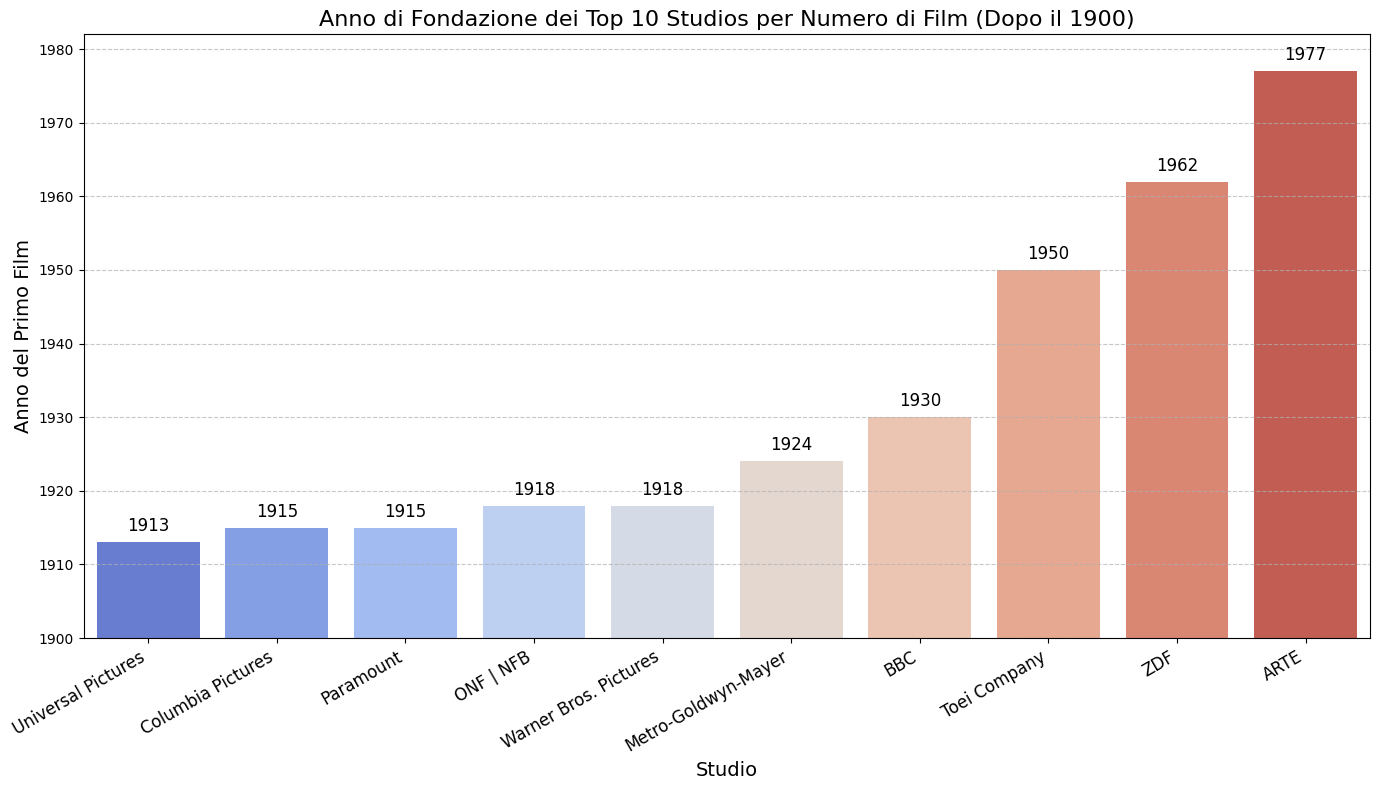

In [3]:
#  Unire i dati degli studios con quelli dei film per ottenere l'anno di uscita di ogni film
studios_with_years = pd.merge(df_studios_clean, df_movies_clean[['id', 'year']],
                              left_on='film_id', right_on='id')

# Filtrare gli studios escludendo year = 0 e year <= 1900
studios_with_years = studios_with_years[studios_with_years['year'] > 1900]

# Selezionare i primi 10 studios per numero totale di film prodotti
top_studios = studios_with_years['studio'].value_counts().nlargest(10).index

# Filtrare il dataset mantenendo solo i film prodotti dai top 10 studios
filtered_studios = studios_with_years[studios_with_years['studio'].isin(top_studios)]

# Calcolare l'anno di inizio (primo film prodotto) per ciascuno dei top 10 studios
studio_start_years_top = filtered_studios.groupby('studio')['year'].min().sort_values()

# Creazione del barplot per visualizzare l'anno di inizio dei top studios
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=studio_start_years_top.index, y=studio_start_years_top.values, palette='coolwarm', hue=studio_start_years_top.index, legend=False)

# Annotare ogni barra con il rispettivo anno
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Personalizzazione del grafico
plt.title('Anno di Fondazione dei Top 10 Studios per Numero di Film (Dopo il 1900)', fontsize=16)
plt.xlabel('Studio', fontsize=14)
plt.ylabel('Anno del Primo Film', fontsize=14)
plt.xticks(rotation=30, fontsize=12, ha='right')
plt.ylim(1900, studio_start_years_top.max() + 5)  # Limita l'asse Y al range rilevante
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Notiamo che i tre studi più prolifici non sono necessariamente i più longevi. Questo suggerisce che il successo potrebbe dipendere da strategie diverse piuttosto che dalla sola anzianità. Esploriamo ora come la loro produzione di film si è evoluta nel tempo.

In [4]:
# Calcolare il numero di film prodotti per studio e anno
studio_year_counts = filtered_studios.groupby(['studio', 'year']).size().reset_index(name='movie_count')

# Creare un grafico interattivo con Plotly
fig = px.line(
    studio_year_counts,
    x='year',
    y='movie_count',
    color='studio',
    title='Number of Movies Produced by Top 10 Studios Over Time',
    labels={'year': 'Year', 'movie_count': 'Number of Movies', 'studio': 'Studio'},
    markers=True,
)

# Personalizzare i layout del grafico
fig.update_layout(
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    legend_title_font_size=14,
    template='plotly_dark',  # Migliora visibilità con uno sfondo scuro
    legend=dict(
        title='Studio',
        font=dict(size=12),
        orientation='h',
        x=0.5,
        xanchor='center',
        y=-0.2
    )
)

# Mostrare il grafico
fig.show()

Dopo aver analizzato questo grafico possiamo fare le prime conclusioni su questa prima domanda.

## Conclusioni preliminari
## Perché questi studi hanno prodotto più film? La longevità potrebbe essere un fattore determinante? Non necessariamente

Si può notare che in alcuni casi la longevità è effettivamente un fattore che spiega il motivo per cui hanno prodotto più film, come ad esempio Paramount, che non ha dei particolari picchi negli anni. In altri casi come nel caso di ARTE che è meno vecchio rispetto ad altri studios ma ha avuto un notevole aumento nella produzione di film negli ultimi anni, cosa che l'ha portato ad essere al quarto posto tra gli studios che hanno prodotto più film.
Interessante anche notare che nel 2020 hanno avuti quasi tutti gli studios un calo nel numero di film, chiaramente causato dalla pandemia, ma nel 2021 si può notare in quasi tutti i casi una certa ripresa, sintomo di come gli studios siano riusciti ad adattarsi al periodo del covid, nonostante la comparsa di questo "cigno nero" nel 2020.

## Domanda: quantità è sinonimo di qualità?

Andiamo a vedere quali sono gli studios con valutazioni più alte e se ci sono i nostri top_studios.

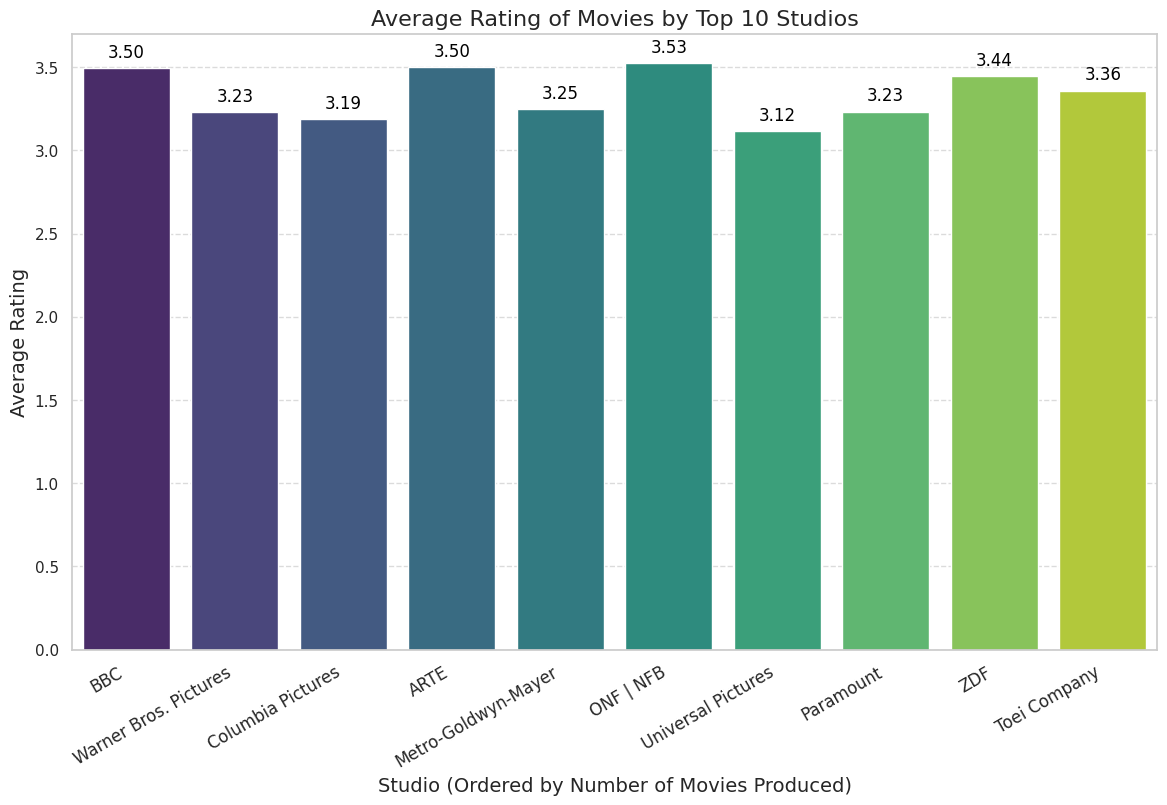

In [31]:
# Effettuare il merge includendo anche la colonna 'rating'
studios_with_years = pd.merge(
    df_studios_clean,
    df_movies_clean[['id', 'rating', 'year']],  # Assicurati di includere 'rating'
    left_on='film_id',
    right_on='id'
)

# Filtrare gli studios per valutazioni valide
studios_with_valid_ratings = studios_with_years.query("rating != -1")

# Selezionare i dati validi per i top 10 studios (ordinati per numero di film prodotti)
studio_counts = df_studios_clean['studio'].value_counts().nlargest(10)
filtered_valid_studios = studios_with_valid_ratings[studios_with_valid_ratings['studio'].isin(studio_counts.index)]

# Calcolare la valutazione media per ogni studio
studio_avg_rating = filtered_valid_studios.groupby('studio')['rating'].mean().reindex(studio_counts.index)

# Visualizzare il barplot ordinato per numero di film
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x=studio_avg_rating.index,
    y=studio_avg_rating.values,
    hue=studio_avg_rating.index,  # Assegna la variabile x a hue
    palette='viridis',
    legend=False  # Rimuove la legenda perché non necessaria
)

# Annotare i valori sopra le barre
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # Valore della valutazione media
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Personalizzazione del grafico
plt.title('Average Rating of Movies by Top 10 Studios', fontsize=16)
plt.xlabel('Studio (Ordered by Number of Movies Produced)', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=30, fontsize=12, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- La maggior parte degli studios ha una valutazione media compresa tra 3.1 e 3.5, indicando una qualità relativamente stabile.
- Studios come **ONF | NFB** e **BBC** mantengono una valutazione elevata nonostante l'elevato numero di produzioni. BBC, in particolare, è lo studio con più film prodotti.
- Studios come **Universal Pictures** e **Columbia Pictures** hanno valutazioni medie più basse, forse a causa di una maggiore diversificazione nella qualità delle loro produzioni.

Proviamo a vedere la distribuzione della valutazione per i diversi studios, per capire se effettivamente certi studios hanno maggiore diversificazione.

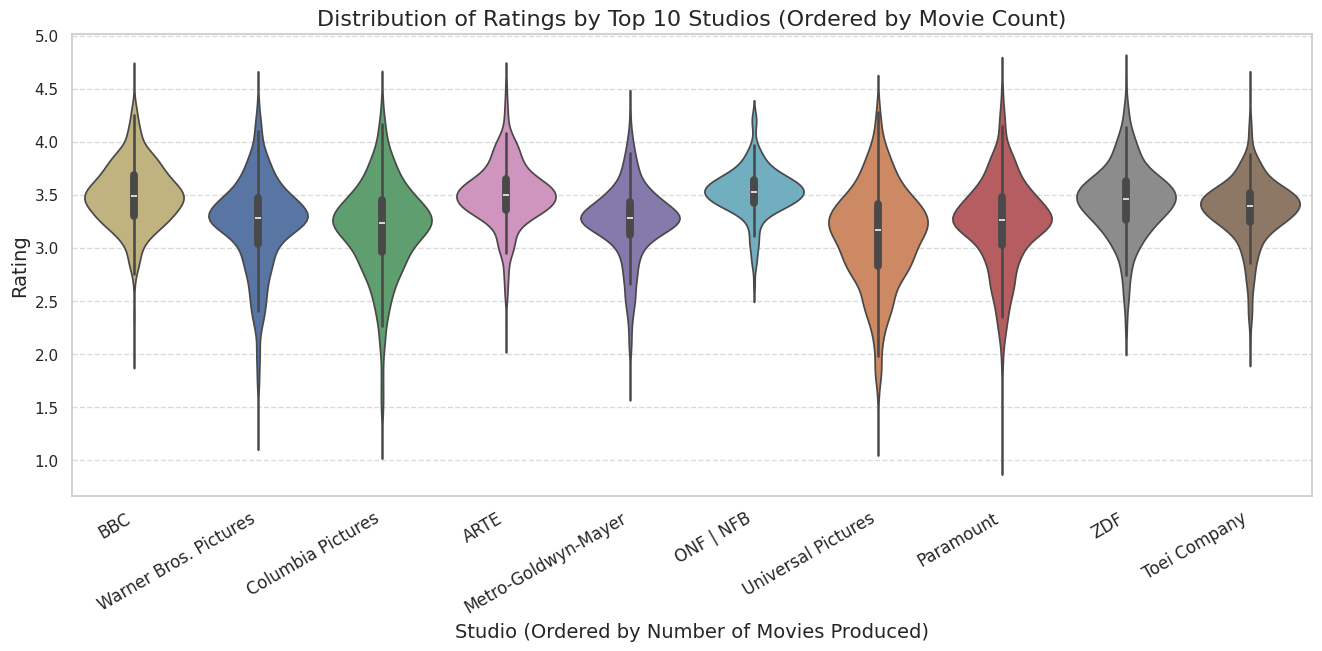

In [32]:
# Filtrare i dati validi (rating != -1) per i top studios
filtered_valid_studios = studios_with_valid_ratings[studios_with_valid_ratings['studio'].isin(studio_counts.index)]

# Creare il violinplot con l'ordine dei top studios
plt.figure(figsize=(16, 6))
sns.violinplot(
    x='studio',
    y='rating',
    data=filtered_valid_studios,
    hue='studio',  # Assegna hue a studio per rispettare il nuovo comportamento
    density_norm='width',  # Sostituisce scale='width' per evitare il warning
    order=studio_counts.index,
    legend=False  # Disabilita la legenda per evitare ridondanze
)

# Configurare titolo, etichette e griglia
plt.title('Distribution of Ratings by Top 10 Studios (Ordered by Movie Count)', fontsize=16)
plt.xlabel('Studio (Ordered by Number of Movies Produced)', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(rotation=30, fontsize=12, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Studios come Universal Pictures, Columbia Pictures, e Metro-Goldwyn-Mayer mostrano
distribuzioni più ampie, indicando che producono sia film molto apprezzati che film con
valutazioni basse.
Al contrario, studios come ONF/NFB e BBC hanno distribuzioni più strette, suggerendo una
qualità più uniforme nei loro film.
Inoltre alcuni studios (es. Paramount) hanno distribuzioni asimmetriche, con una coda più
lunga verso le valutazioni basse, suggerendo la presenza di film meno apprezzati.
Studios come ZDF e Toei Company hanno distribuzioni più centrate, indicando una produzione
stabile con meno outlier.

### Conclusioni preliminari:
### Quantità è sinonimo di qualità? Non necessariamente
Studios con un'alta produzione (es. Universal Pictures e Paramount) non sempre hanno valutazioni medie elevate. La quantità non sembra essere un indicatore diretto di qualità.
Studios come ONF/NFB e BBC sembrano puntare più sulla qualità che sulla quantità, come evidenziato dalle loro valutazioni medie elevate e distribuzioni strette.


Una domanda che sorge spontanea da questa analisi è se i generi prodotto dagli studios influenzano in qualche modo le valutazioni dei loro film e la loro distribuzione. Magari certi studios hanno diversificato di più la loro produzione, portando di conseguenza a una maggiore distribuzione delle valutazioni.

### Domanda: Il genere influisce sulla qualità? Più diversificazione equivale a meno qualità?

Calcoliamo la valutazione media per genere considerando solo i film prodotti dai top studios.

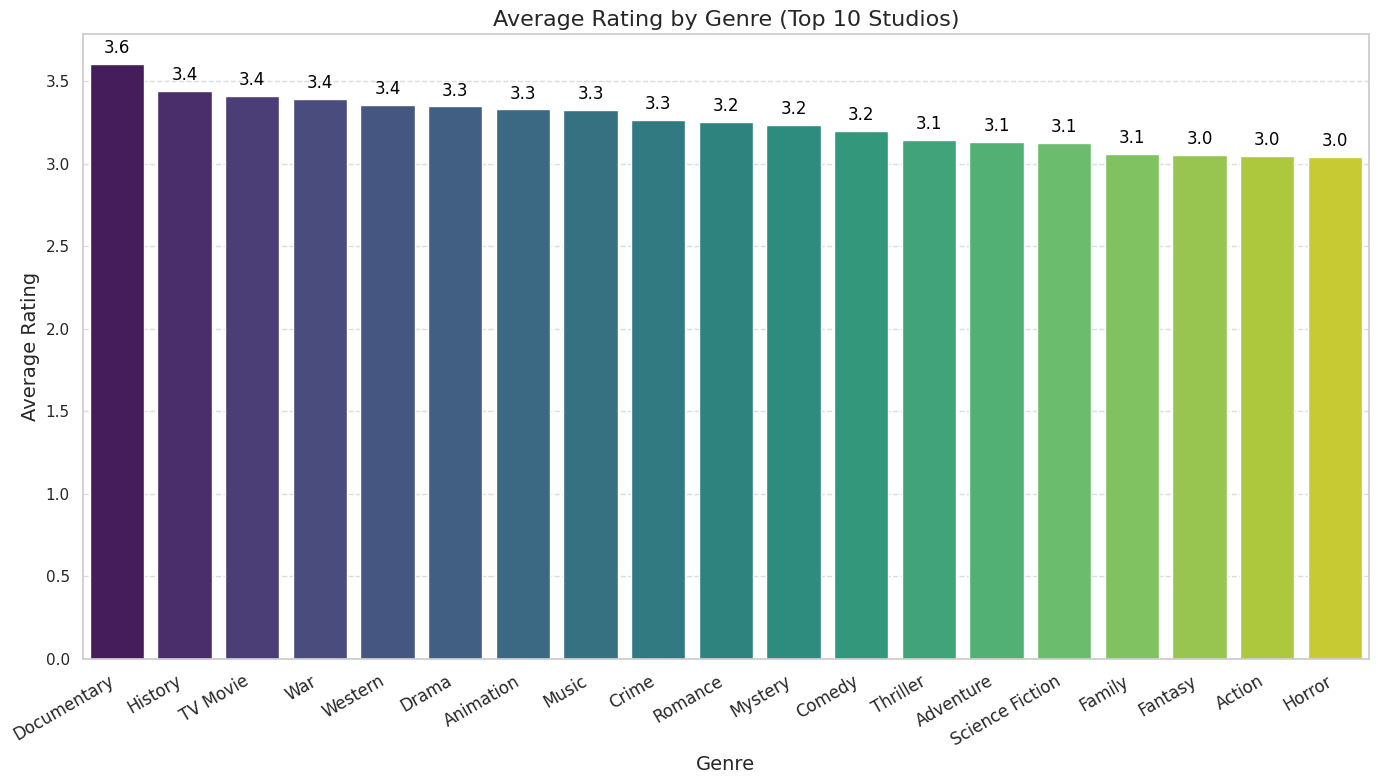

In [33]:
# Unire studios, generi e valutazioni
genres_with_ratings = pd.merge(
    df_movies_clean[['id', 'rating']],
    df_genres_clean,
    left_on='id',
    right_on='film_id'
).query("rating != -1")

# Unire studios e generi per i top studios
studios_with_genres = pd.merge(
    df_studios_clean, df_genres_clean, on='film_id'
)
top_studios_list = studio_counts.index
filtered_genres_top_studios = studios_with_genres[
    studios_with_genres['studio'].isin(top_studios_list)
]

# Filtrare i generi validi per i top studios
filtered_genres_with_ratings = genres_with_ratings[
    genres_with_ratings['film_id'].isin(filtered_genres_top_studios['film_id'])
]

# Calcolare la valutazione media per genere
top_studios_genre_avg_rating = filtered_genres_with_ratings.groupby('genre')['rating'].mean().sort_values(ascending=False)

# Visualizzare il barplot delle valutazioni medie per genere
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x=top_studios_genre_avg_rating.index,
    y=top_studios_genre_avg_rating.values,
    palette='viridis',
    hue=top_studios_genre_avg_rating.index,
    legend=False
)

# Annotare i valori sopra le barre
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Configurare titolo e assi
plt.title('Average Rating by Genre (Top 10 Studios)', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=30, fontsize=12, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Generi come **documentari** e **film storici** sono mediamente più apprezzati, probabilmente grazie al loro focus su argomenti di interesse culturale e storico.
- Generi come **horror** e **action** tendono ad avere valutazioni più basse, forse a causa della loro maggiore produzione e della varietà di qualità tra i film.

Per rispondere alla seconda parte della domanda, calcoliamo la valutazione media e la diversificazione dei generi per ciascuno dei top_studios e visualizziamo i dati in uno scatterplot.

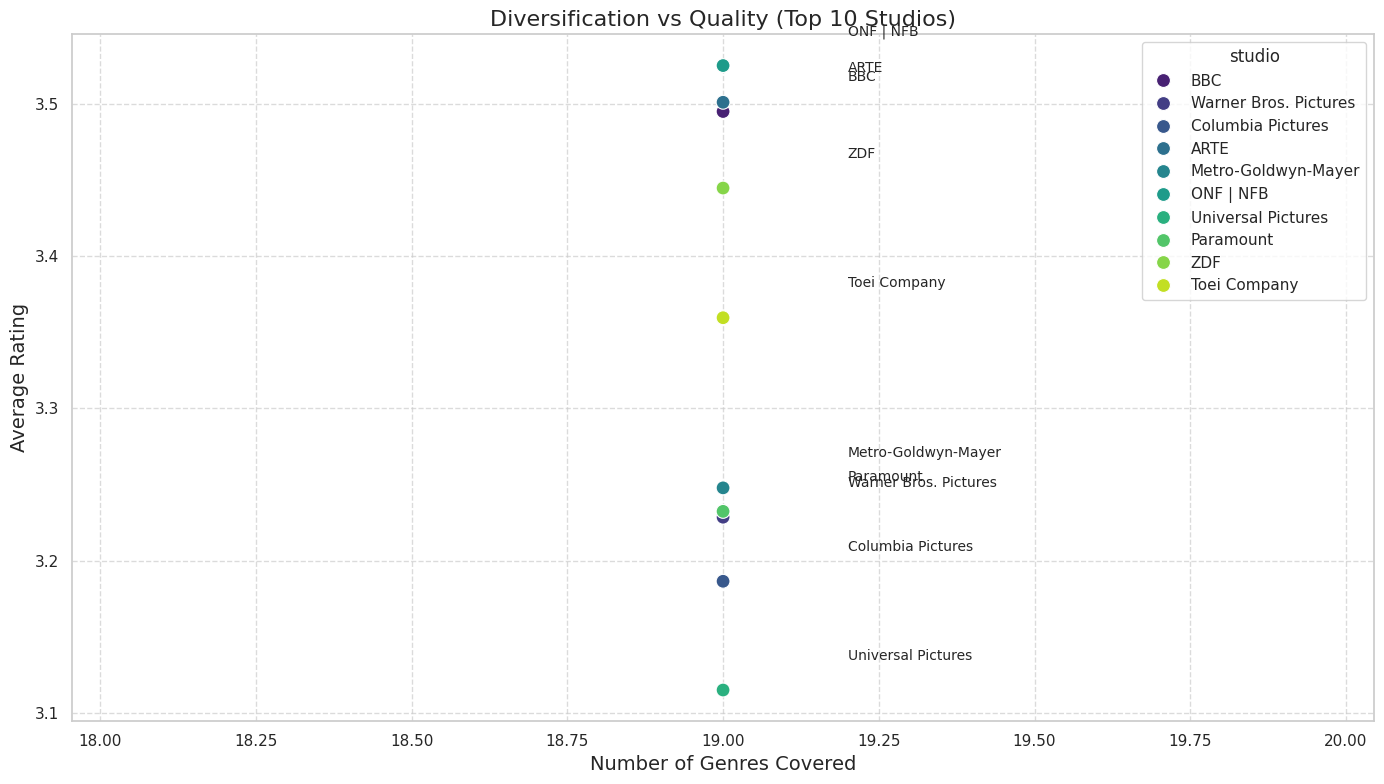

In [34]:
# Calcolare la diversificazione e la valutazione media per i top studios
top_studios_genre_quality = filtered_genres_top_studios.merge(
    filtered_valid_studios.groupby('studio')['rating'].mean(),
    on='studio'
).groupby('studio').agg({'genre': 'nunique', 'rating': 'mean'}).reindex(top_studios_list)
top_studios_genre_quality.columns = ['genre_count', 'avg_rating']

# Visualizzare lo scatterplot (diversificazione vs qualità)
plt.figure(figsize=(14, 8))
sns.scatterplot(
    x='genre_count',
    y='avg_rating',
    data=top_studios_genre_quality,
    hue=top_studios_genre_quality.index,
    palette='viridis',
    s=100
)

# Annotare i punti con il nome dello studio
for i, row in top_studios_genre_quality.iterrows():
    plt.text(row['genre_count'] + 0.2, row['avg_rating'] + 0.02, i, fontsize=10)

# Aggiungere titolo e etichette
plt.title('Diversification vs Quality (Top 10 Studios)', fontsize=16)
plt.xlabel('Number of Genres Covered', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Tutti i top studios producono film in una gamma di generi molto simile, indicando che la diversificazione non è un fattore discriminante.
- Tuttavia, studios come **ONF/NFB** e **BBC** riescono a mantenere una qualità più alta, probabilmente grazie a strategie produttive mirate o una maggiore selettività.
- Studios con qualità media più bassa, come **Universal Pictures**, potrebbero puntare su una produzione di massa con meno focus sulla qualità.

Analizziamo la contribuzione dei generi per ognuno dei top studios.

In [35]:
# Contare il numero di film per ogni studio e genere
studio_genre_counts = filtered_genres_top_studios.groupby(['studio', 'genre']).size().reset_index(name='count')

# Ordinare gli studios sull'asse X in base al numero totale di film
studio_genre_counts['studio'] = pd.Categorical(
    studio_genre_counts['studio'],
    categories=studio_genre_counts.groupby('studio')['count'].sum().sort_values(ascending=False).index,
    ordered=True
)

# Creare un grafico interattivo a barre impilate
fig = px.bar(
    studio_genre_counts,
    x='studio',
    y='count',
    color='genre',
    title='Genre Contribution to Top 10 Studios',
    labels={'count': 'Number of Movies', 'studio': 'Studio', 'genre': 'Genre'},
    text_auto=True
)

# Personalizzare il layout del grafico
fig.update_layout(
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    legend_title_font_size=14,
    template='plotly_dark',
    barmode='stack',
    xaxis=dict(tickangle=-45),
    legend=dict(
        title='Genre',
        font=dict(size=12),
        orientation='v',
        x=1.02,
        xanchor='left',
        y=1
    )
)

# Migliorare i colori delle barre
fig.update_traces(marker=dict(line=dict(width=0.5, color='black')))

# Mostrare il grafico interattivo
fig.show()

- Studios come **BBC** e **ARTE** mostrano una chiara prevalenza di documentari, suggerendo un focus su un pubblico di nicchia o su produzioni culturalmente rilevanti.
- Al contrario, studios come **ZDF** e **Universal Pictures** appaiono più bilanciati nella distribuzione dei generi, indicando una strategia di diversificazione per attrarre un pubblico più vasto.
- Generi come **animazione** o **commedia** sono meno presenti in studios come ARTE e BBC, riflettendo scelte produttive specifiche.

Distribuzione delle valutazioni per genere nei top studios:

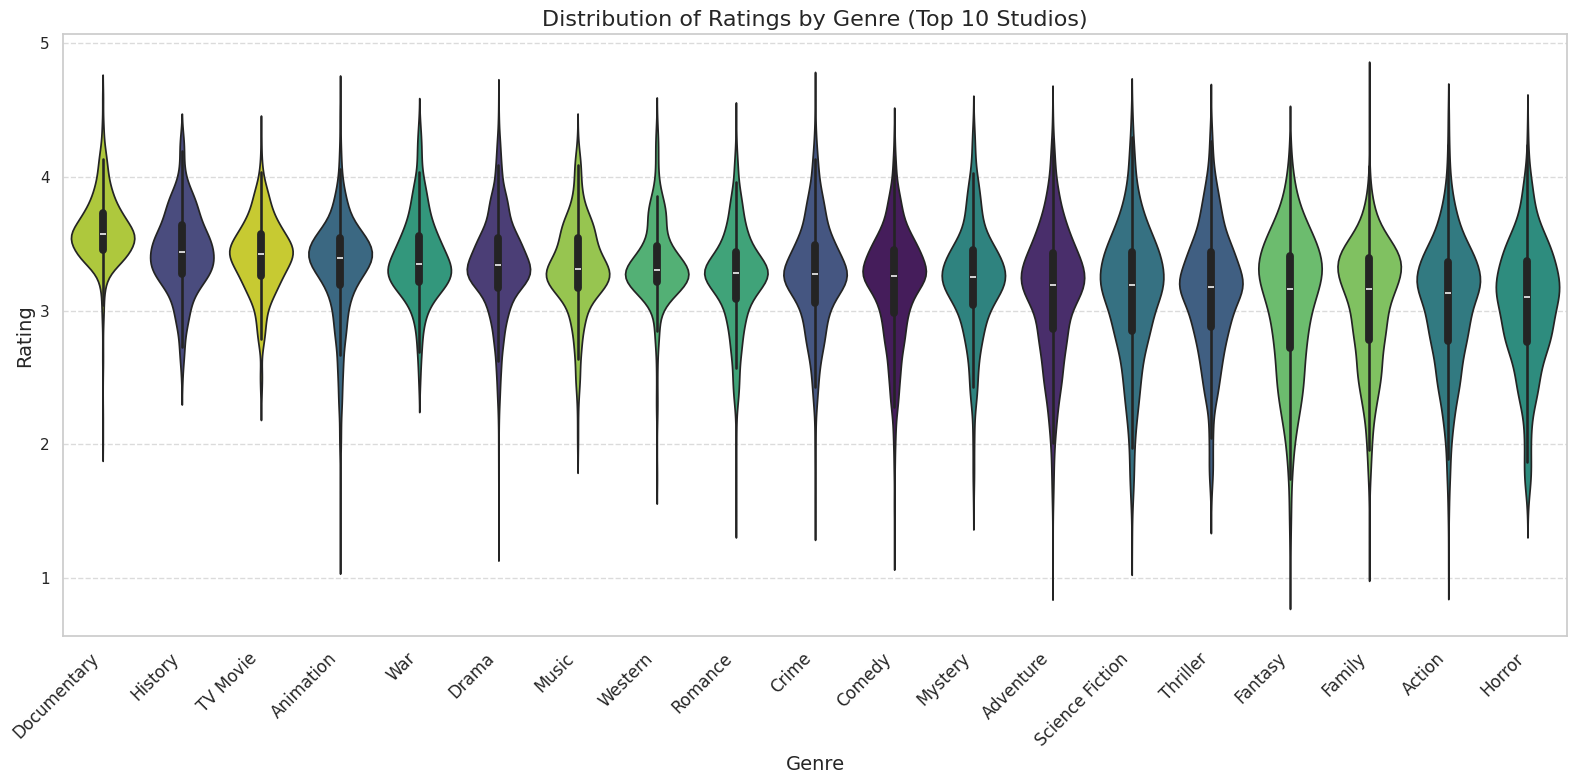

In [36]:
# Creare un violinplot per i generi nei top studios
plt.figure(figsize=(16, 8))

# Ordinare i generi in base alla mediana delle valutazioni
order = (
    filtered_genres_with_ratings.groupby('genre')['rating']
    .median()
    .sort_values(ascending=False)
    .index
)

sns.violinplot(
    x='genre',
    y='rating',
    data=filtered_genres_with_ratings,
    hue='genre',
    order=order,  # Ordina i generi in base alla mediana
    palette='viridis',
    density_norm='width',
    legend=False
)

plt.title('Distribution of Ratings by Genre (Top 10 Studios)', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Il violinplot fornisce molte informazioni sulla distribuzione qualitativa per ciascun genere:
- Generi come Documentary e History mostrano distribuzioni strette, con valutazioni generalmente alte.
- Generi come Comedy e Horror hanno distribuzioni più ampie, indicando una maggiore diversità qualitativa.
- La presenza di valori estremi (outlier) in generi come Thriller o Action suggerisce una produzione eterogenea, con sia film di grande successo che valutati negativamente.


Valutazioni per Genere nei Top Studios: Chi si distingue?

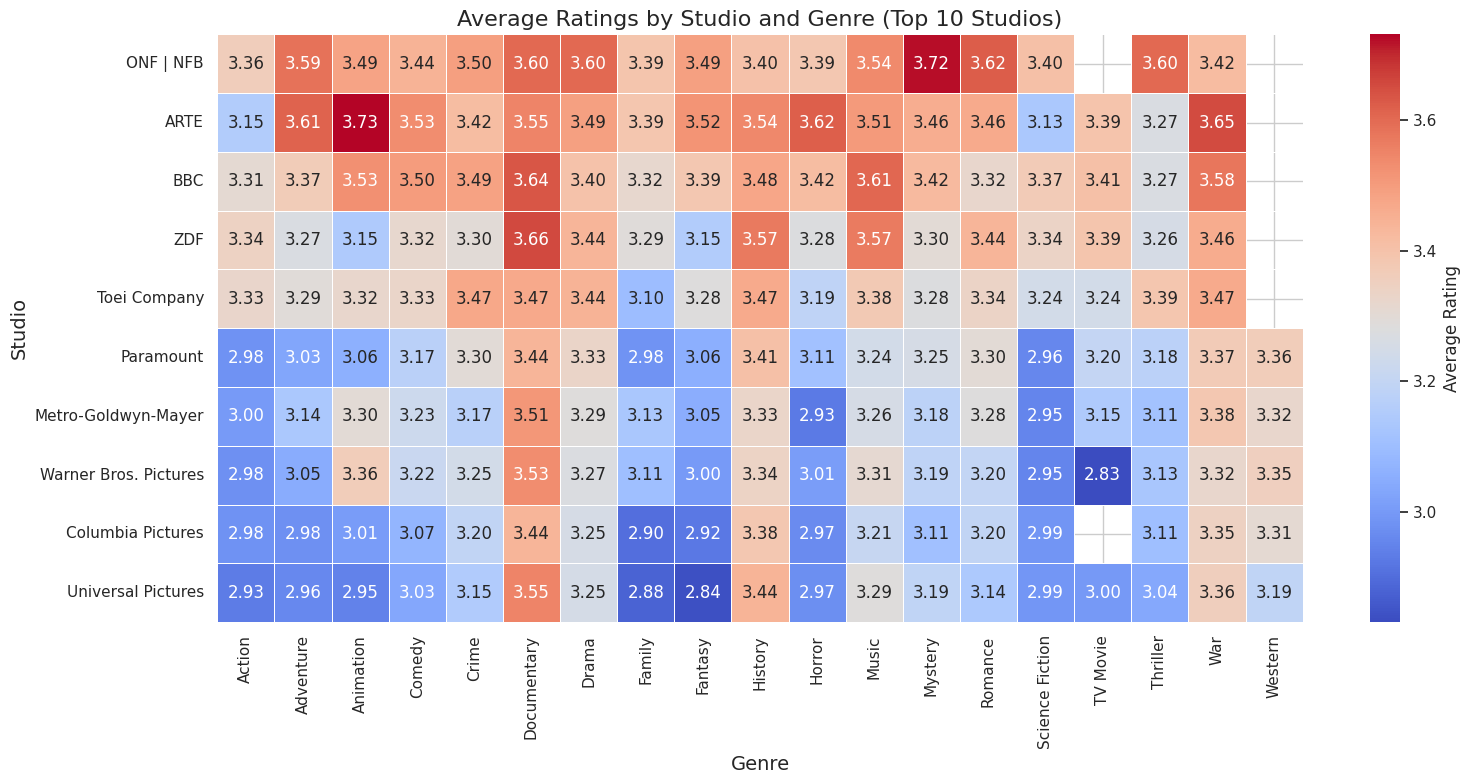

In [37]:
# Unire i dati per aggiungere lo studio a ciascun film con valutazione valida
filtered_genres_with_ratings = pd.merge(
    filtered_genres_with_ratings,
    filtered_genres_top_studios[['film_id', 'studio']],
    on='film_id',
    how='inner'
)

# Calcolare la valutazione media per ogni studio e genere
studio_genre_ratings = filtered_genres_with_ratings.groupby(['studio', 'genre'])['rating'].mean().reset_index()

# Creare una matrice pivot per la heatmap
pivot_ratings = studio_genre_ratings.pivot(index='studio', columns='genre', values='rating')

# Ordinare gli studios in base alla valutazione media complessiva
pivot_ratings = pivot_ratings.loc[pivot_ratings.mean(axis=1).sort_values(ascending=False).index]

# Visualizzare la heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(
    pivot_ratings,
    cmap='coolwarm',
    annot=True,
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'label': 'Average Rating'}
)

plt.title('Average Ratings by Studio and Genre (Top 10 Studios)', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Studio', fontsize=14)
plt.tight_layout()
plt.show()

- Studios come **BBC** si distinguono per la qualità nei documentari, supportata da una vasta produzione.
- Generi come **Animation** (ARTE) e **Mystery** (ONF|NFB) hanno valutazioni elevate, ma il numero di film prodotti in questi generi potrebbe essere limitato.
- Per comprendere meglio la specializzazione, è importante considerare sia la qualità (valutazione media) che la quantità (numero di film per genere), ad esempio uno studio potrebbe aver fatto 2 film per un determinato genere con una valutazione alta, ma ciò non vuol dire che sono specializzati in quell'ambito.

In [38]:
# Calcolare il numero di film e la valutazione media per ciascun studio e genere
studio_genre_stats = filtered_genres_with_ratings.groupby(['studio', 'genre']).agg(
    movie_count=('film_id', 'count'),
    avg_rating=('rating', 'mean')
).reset_index()

# Creare un grafico interattivo con Plotly
fig = px.scatter(
    studio_genre_stats,
    x='movie_count',
    y='avg_rating',
    size='movie_count',
    color='studio',
    hover_name='genre',
    hover_data={
        'movie_count': True,
        'avg_rating': True,
        'genre': True,
        'studio': True
    },
    title='Correlation Between Number of Movies, Genre, and Average Ratings',
    labels={
        'movie_count': 'Number of Movies',
        'avg_rating': 'Average Rating',
        'studio': 'Studio'
    },
    size_max=30
)

# Personalizzare il layout
fig.update_layout(
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    legend_title_font_size=14,
    template='plotly_dark',
    xaxis=dict(showgrid=True, gridcolor='gray'),
    yaxis=dict(showgrid=True, gridcolor='gray')
)

# Mostrare il grafico interattivo
fig.show()

Da questo grafico possiamo sia confermare alcune delle supposizioni che abbiamo fatto prima: ci sono certi studios come **BBC** e **ARTE** che eccellono in generi specifici (documentary, history,...), mentre altri studios più commerciali come **Warner Bros** e **Universal Pictures**, coprono una gamma più ampia di generi, spesso con valutazioni medie inferiori.
Possiamo notare l'importanza di aver considerato il numero di film poiché ad esempio avevamo notato prima che **ONF|NFB** aveva una valutazione alta per mystery, ma ha fatto solamente 3 film per quel genere. Ciò nonostante è interessante notare come pur avendo fatto molti meno film rispetto a studios come **Warner Bros** ad esempio, **ONF|NFB** sembrano puntare molto sul genere dell'animation, avendo un'ottima qualità.

### Conclusioni preliminari
### Il genere influisce sulla qualità? Sì
Dai grafici emerge che:
- Generi come **Documentary**, **History** e **TV Movie** tendono ad avere valutazioni medie più alte, probabilmente perché attraggono produzioni più curate o un pubblico più selettivo. Ad esempio, **BBC** si distingue per i documentari con valutazioni costantemente alte.
- Generi popolari come **Action** e **Comedy** mostrano una maggiore variabilità nella qualità. Studios come **Warner Bros** e **Universal Pictures**, con produzioni di massa in questi generi, hanno valutazioni medie più basse.
- La qualità non è uniforme all'interno di un genere: alcuni studios eccellono in determinati generi, come **BBC** in **History** o **ONF|NFB** in **Documentary**, indicando una specializzazione mirata.

**Conclusione:**
La qualità media dei film è chiaramente influenzata dal genere. Generi di nicchia o meno commerciali sono spesso associati a valutazioni più alte, mentre i generi di massa soffrono di una maggiore variabilità nella qualità.

### Più diversificazione equivale a meno qualità? In generale sì.
Dai grafici emerge che:
- Studios altamente diversificati, come **Universal Pictures** e **Warner Bros**, producono molti film in una vasta gamma di generi popolari (es. **Action**, **Comedy**), ma con valutazioni medie intorno a 3.1-3.2.
- Al contrario, studi specializzati come **ONF|NFB** e **BBC**, che si concentrano su pochi generi di nicchia (es. **Documentary**, **History**), tendono a ottenere valutazioni medie più alte, spesso sopra il 3.4.

**Conclusione:**
Gli studios che si concentrano su pochi generi ottengono una qualità superiore grazie a una maggiore coerenza e specializzazione. Al contrario, quelli più diversificati, pur coprendo un'ampia offerta, sacrificano la qualità per una produzione di massa.

## Domanda: Il paese di produzione influisce sul successo dei top studios? Che strategia adottano?

Potremmo chiederci, a questo punto, se il paese di produzione influisce sul successo degli studios. Esistono determinati paesi che contribuiscono maggiormente al loro successo? Inoltre, quale strategia adottano i top studios? Si concentrano su pochi paesi chiave o diversificano la produzione su scala globale? E come queste scelte influenzano la loro qualità e quantità di film prodotti?

In [39]:
os.environ['PROJ_LIB'] = '/home/bigbigdario/miniconda3/share/proj'

# Path ai dati geografici scaricati manualmente
data_directory = "data/ne_110m_admin_0_countries/"
countries_gdf = gpd.read_file(data_directory + "ne_110m_admin_0_countries.shp")

# Sostituire eventuali nomi non standard (ad esempio, US -> United States of America)
countries_gdf['ADMIN'] = countries_gdf['ADMIN'].replace('US', 'United States of America')

# Controllare e pulire i dati geografici
if countries_gdf.crs is None:
    countries_gdf = countries_gdf.set_crs("EPSG:4326")  # Imposta WGS84 se il CRS è assente
countries_gdf = countries_gdf[countries_gdf.is_valid & ~countries_gdf.is_empty]  # Rimuove geometrie non valide

# Passo 1: Filtrare solo i top studios
top_studios_list = studio_counts.index  # Lista dei top studios già calcolata
top_studios_data = studios_with_years[studios_with_years['studio'].isin(top_studios_list)]

# Passo 2: Unire i top studios con il dataset dei paesi
top_studios_geo = pd.merge(
    top_studios_data,  # Film prodotti dai top studios
    df_countries_clean,  # Paesi di produzione
    on='film_id',
    how='inner'
)

# Passo 3: Calcolare il numero di film per paese e studio
top_studios_country_stats = top_studios_geo.groupby(['country', 'studio']).agg(
    num_movies=('film_id', 'count')
).reset_index()

# Passo 4: Unire con il dataset geografico per la visualizzazione
world_top_studios = countries_gdf.merge(
    top_studios_country_stats.groupby('country').agg(
        total_movies=('num_movies', 'sum')  # Film totali per paese
    ).reset_index(),
    left_on='ADMIN',
    right_on='country',
    how='left'
)
world_top_studios['total_movies'] = world_top_studios['total_movies'].fillna(0)

# **Mappa Interattiva con Folium (Dominanza per Paese)**
world_top_studios = world_top_studios.to_crs("EPSG:4326")  # CRS compatibile con lat/lon
m = folium.Map(location=[20, 0], zoom_start=2)

# Layer coropletico per i film prodotti
folium.Choropleth(
    geo_data=world_top_studios.__geo_interface__,
    data=world_top_studios,
    columns=['ADMIN', 'total_movies'],
    key_on='feature.properties.ADMIN',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Movies Produced by Top Studios"
).add_to(m)

# Cluster per mostrare i dettagli dei paesi con produzione elevata
marker_cluster = MarkerCluster().add_to(m)
for _, row in world_top_studios.iterrows():
    if row['total_movies'] > 0:
        folium.Marker(
            location=[row.geometry.centroid.y, row.geometry.centroid.x],
            popup=f"{row['ADMIN']}: {int(row['total_movies'])} movies"
        ).add_to(marker_cluster)

# Salvare e mostrare la mappa
m.save("top_studios_movies_by_country_map_clustered.html")
m

### Osservazioni dalla mappa:
- **Stati Uniti:** Dominano la produzione globale con una quantità nettamente superiore rispetto ad altri paesi.
- **Europa:** I maggiori contributori sono **Regno Unito** e **Germania**, ma la produzione è più distribuita rispetto agli Stati Uniti.
- **Asia:** **Giappone** è il principale contributore, con un focus probabilmente su generi specifici come l'animazione.
- **Altre regioni:** In Sud America, Oceania e Africa, la produzione è frammentata, con contributi più limitati ma diversificati.

**Conclusione:**
La diversificazione geografica varia significativamente tra gli studios, riflettendo scelte strategiche e mercati di riferimento. Gli Stati Uniti restano il centro dominante, mentre Europa e Asia mostrano contributi importanti ma più distribuiti.


Vediamo adesso nei vari Paesi quali sono gli studios che investono di più.

In [14]:
# Generare la treemap con hovertemplate personalizzato
fig = px.treemap(
    top_studios_country_stats,
    path=['country', 'studio'],
    values='num_movies',
    color='num_movies',
    color_continuous_scale='YlOrRd',
    title="Top Studios and Movies Produced by Country"
)

# Personalizzare hovertemplate e bordi
fig.update_traces(
    hovertemplate='<b>%{label}</b><br>'
                  'Movies Produced: %{value}<br>'
                  'Country: %{parent}<extra></extra>',
    marker=dict(line=dict(color='black', width=0.5))
)

# Uniformare la scala dei colori
fig.update_coloraxes(cmin=0, cmax=3000)

# Mostrare la treemap
fig.show()

### Osservazioni dalla Treemap:
- **Stati Uniti:** Dominano la produzione globale, con studios come **Warner Bros**, **Metro-Goldwyn-Mayer** e **Columbia Pictures** che guidano il mercato.
- **Europa:** Studios locali come **BBC** nel Regno Unito e **ZDF** in Germania giocano un ruolo chiave, contribuendo significativamente alla produzione europea.
- **Canada e Giappone:** Studios come **ONF|NFB** e **Toei Company** sono i principali contributori nei rispettivi paesi.
- **Diversificazione geografica:** I dati evidenziano una forte concentrazione negli Stati Uniti, mentre la produzione negli altri paesi è più frammentata.


Vediamo adesso il contrario, per ogni studios quali sono i Paesi su cui si concentrano.

In [15]:
# Creare una treemap per la diversificazione geografica con colorazione per paese
fig_treemap = px.treemap(
    top_studios_country_stats,  # Dati con 'num_movies'
    path=['studio', 'country'],  # Struttura: Studio > Paese
    values='num_movies',  # Numero totale di film prodotti
    color='country',  # Colore in base al paese
    color_continuous_scale='Cividis',  # Scala colori distintiva
    title='Geographic Distribution of Movies by Top Studios'
)

# Personalizzare hovertemplate e bordi
fig_treemap.update_traces(
    hovertemplate='<b>%{label}</b><br>'
                  'Movies Produced: %{value}<br>'
                  'Studio Total: %{parent}<extra></extra>',
    marker=dict(line=dict(color='black', width=0.5))
)

# Personalizzare il layout e la barra colori
fig_treemap.update_layout(
    title_font_size=20,
    template='plotly_dark',
    coloraxis_colorbar=dict(
        title="Countries",
        ticks="outside"
    )
)

# Mostrare la treemap
fig_treemap.show()

### Osservazioni dalla Treemap:
- **Stati Uniti:** Studios come **Warner Bros**, **Metro-Goldwyn-Mayer** e **Columbia Pictures** concentrano la produzione esclusivamente all'interno del mercato statunitense, dominando la scena nazionale.
- **Europa:** Studios come **BBC** (Regno Unito) e **ZDF** (Germania) mostrano una diversificazione significativa, con ARTE che opera in entrambi i paesi (Francia e Germania).
- **Asia e Canada:** Studios come **Toei Company** (Giappone) e **ONF|NFB** (Canada) si focalizzano quasi esclusivamente sui mercati locali, probabilmente adattandosi a preferenze culturali e audience di riferimento.


**Ma la diversificazione dei Paesi di produzione influisce sulla qualità?**

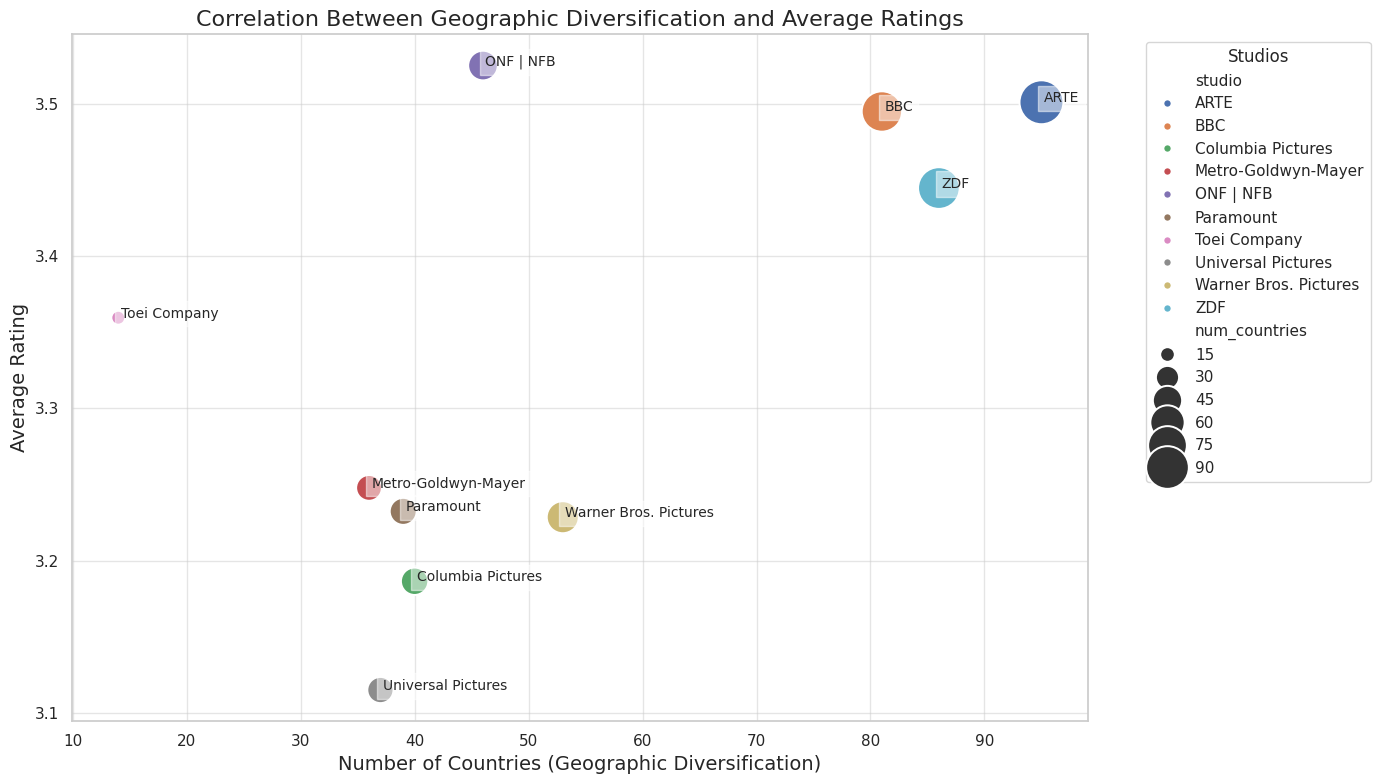

In [16]:
# Step 1: Misurare la diversificazione geografica
geo_diversification = top_studios_country_stats.groupby('studio')['country'].nunique().reset_index()
geo_diversification.columns = ['studio', 'num_countries']

# Step 2: Calcolare la qualità media
studio_avg_rating = (
    studios_with_valid_ratings.groupby('studio')['rating'].mean().reset_index()
)
studio_avg_rating.columns = ['studio', 'avg_rating']

# Step 3: Unire le metriche
studio_analysis = pd.merge(geo_diversification, studio_avg_rating, on='studio')

# Step 4: Visualizzare la correlazione
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))
sns.scatterplot(
    x='num_countries',
    y='avg_rating',
    size=studio_analysis['num_countries'],  # Dimensione basata sul numero di paesi
    sizes=(100, 1000),
    hue=studio_analysis['studio'],  # Colore in base agli studios
    data=studio_analysis
)

# Annotare i punti con i nomi degli studios
for i, row in studio_analysis.iterrows():
    plt.text(
        row['num_countries'] + 0.2,
        row['avg_rating'],
        row['studio'],
        fontsize=10,
        bbox=dict(facecolor='white', alpha=0.5)
    )

# Titolo e etichette
plt.title('Correlation Between Geographic Diversification and Average Ratings', fontsize=16)
plt.xlabel('Number of Countries (Geographic Diversification)', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.grid(alpha=0.5)
plt.legend(title='Studios', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Osservazioni:
- Studios con **bassa diversificazione geografica**, come Warner Bros e Columbia Pictures, mostrano valutazioni mediamente più basse (~3.1-3.2).
- Studios con una **maggiore diversificazione** (es. BBC, ARTE) tendono a ottenere valutazioni medie superiori (~3.5 o più), evidenziando che la diversificazione geografica potrebbe favorire la qualità percepita.
- Alcuni studios (es. ZDF) dimostrano che una diversificazione mirata a specifici mercati europei può essere associata a qualità elevata, anche senza raggiungere la massima diversificazione.

**Mettiamo adesso insieme tutti questi ultimi aspetti, studios, valutazioni e Paesi di produzione.**

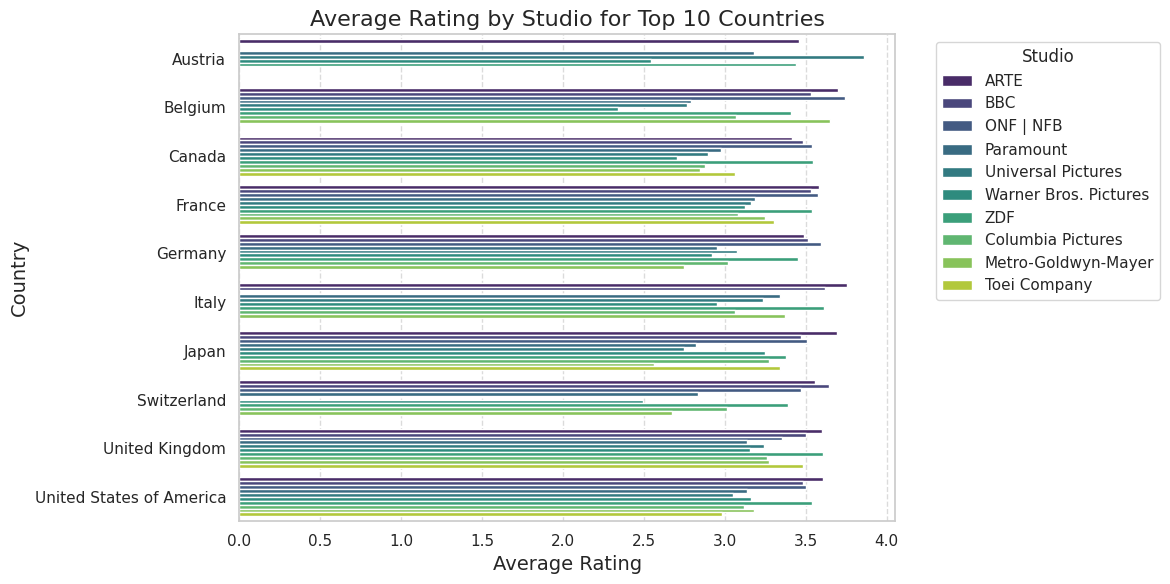

In [17]:
# Unire studios, valutazioni e paesi
studio_country_ratings = pd.merge(
    top_studios_geo,  # Dati su studios e paesi
    studios_with_valid_ratings[['film_id', 'rating']],  # Film con valutazioni valide
    on='film_id',  # Collegare tramite l'id dei film
    how='inner'
)

# Filtrare i Paesi con almeno 10 film prodotti per studio
filtered_country_ratings = studio_country_ratings.groupby(['country', 'studio']).agg(
    num_movies=('film_id', 'count'),
    avg_rating=('rating_x', 'mean')
).reset_index()

# Filtrare i Paesi principali (ad esempio, i primi 10 con il maggior numero di film prodotti)
top_countries = (
    filtered_country_ratings.groupby('country')['num_movies'].sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filtrare i dati solo per i Paesi principali
top_country_ratings = filtered_country_ratings[filtered_country_ratings['country'].isin(top_countries)]

# Creare un barplot orizzontale
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_country_ratings,
    x='avg_rating',
    y='country',
    hue='studio',
    palette='viridis'
)

# Configurare il grafico
plt.title('Average Rating by Studio for Top 10 Countries', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.legend(title='Studio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Osservazioni
- Dal grafico possiamo notare che studios come **BBC**, **ARTE** e **ZDF**, che operano prevalentemente in Europa, tendono a concentrarsi su particolari Paesi
(Francia e Germania ad esempio)
- Studios come **Warner Bros** e **Universal Pictures**, più commerciali e globali, mostrano una presenza in
quasi tutti i paesi rappresentati.
- Possiamo notare che gli studi con una forte base in Canada (ad esempio **ONF|NFB**) e in Francia (come **ARTE**) mostrano valutazioni medie costantemente alte, riflettendo la scelta di trattare documentari o produzioni più culturali curate per un pubblico più selettivo.
- La **Toei Company**, principale studio giapponese, sembra mantenere una buona qualità, confermata dalle valutazioni alte nel suo Paese.
- Gli studi statunitensi, come **Warner Bros** e **Universal**, pur essendo i più diversificati, non eccellono in qualità, con valutazioni medie spesso inferiori rispetto a studios focalizzati.

## Conclusioni preliminari

## Il paese di produzione influisce sul successo dei top studios? Sì, sia in termini di quantità che di qualità.
- Gli Stati Uniti dominano la produzione cinematografica globale in termini di quantità, grazie a studios come Warner Bros, Universal Pictures e Columbia Pictures. Tuttavia, la qualità media dei film prodotti negli Stati Uniti tende a essere inferiore rispetto a quella di paesi come Regno Unito, Germania, Francia o Giappone.
- In Europa e in Giappone, studios come BBC, ZDF, ARTE e Toei Company producono meno film, ma si distinguono per una qualità media più alta, spesso specializzandosi in generi specifici (es. documentari, animazione).

Possiamo per cui concludere che la qualità sembra quindi essere più alta nei paesi con una produzione meno diversificata in termini di genere e pubblico e più focalizzata, rispetto agli Stati Uniti, dove il mercato globale porta a una maggiore quantità ma a una qualità meno uniforme.


## Che strategia adottano i top studios?  I top studios adottano strategie diverse in base al loro contesto geografico e obiettivi di mercato.
- Studios americani: Hanno una strategia di diversificazione geografica e di generi, producendo film in numerosi paesi e per un mercato globale. Questa strategia probabilmente permette loro di massimizzare i profitti, ma spesso a scapito della qualità media.
- Studios europei e canadesi (BBC, ZDF, ARTE, ONF|NFB): Si concentrano su meno paesi e su generi specifici, come documentari e film storici. Questa specializzazione consente loro di mantenere una qualità media più alta.
- Studios giapponesi (Toei Company): Mostrano una produzione altamente focalizzata, prevalentemente nel mercato locale e in generi come l'animazione, che sono apprezzati a livello globale.

**Conclusione:**
Il contesto geografico influenza fortemente la strategia adottata dai top studios:
- Nei mercati globali come gli Stati Uniti, prevale la quantità e la diversificazione.
- Nei mercati regionali (Europa, Giappone, Canada), prevalgono specializzazione e identità culturale, con un focus sulla qualità.

## Domanda: come scelgono gli studios la durata di un loro prodotto?

La durata di un film o di una produzione potrebbe indicare il pubblico a cui gli studios si rivolgono.

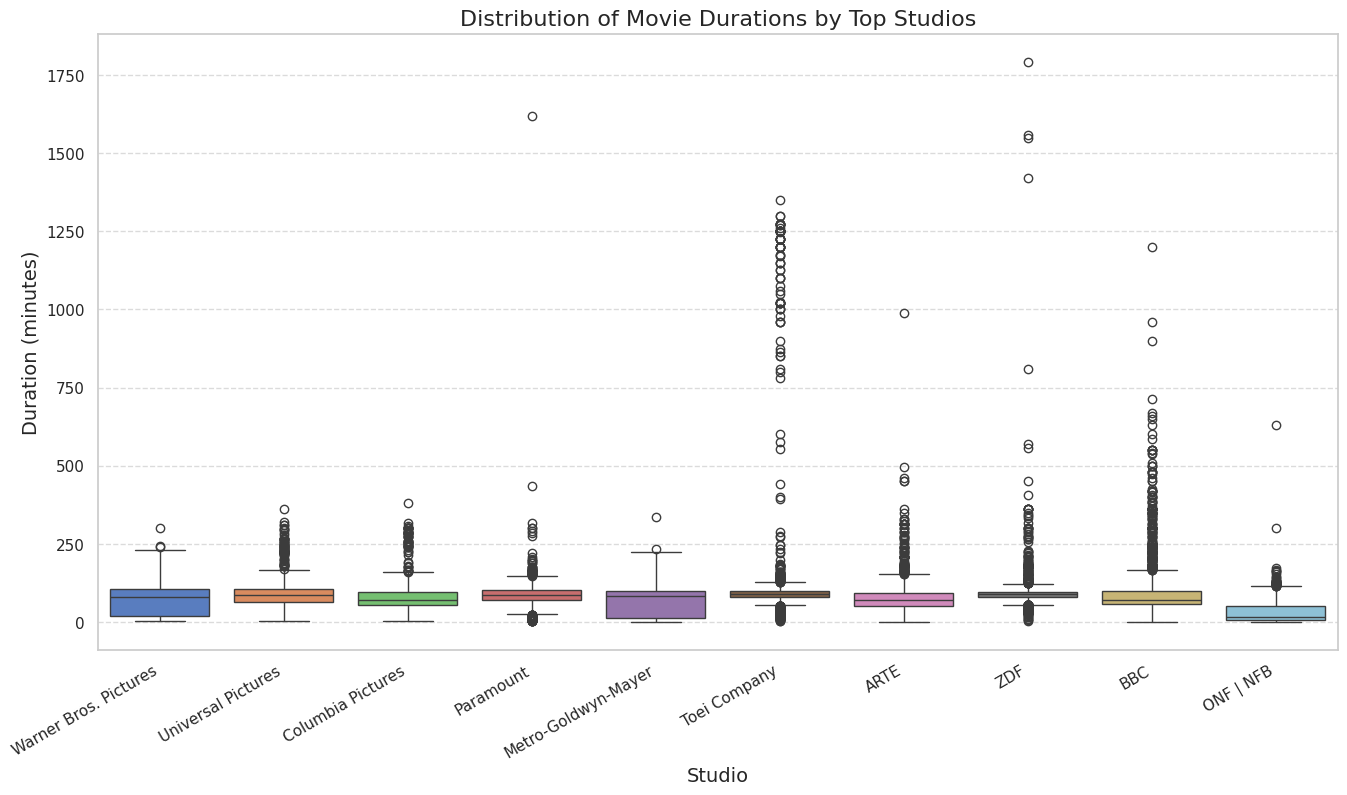

In [18]:
filtered_studios = pd.merge(
    df_studios_clean[df_studios_clean['studio'].isin(top_studios)],
    df_movies_clean[['id', 'minute', 'rating', 'year']],  # Aggiungi 'minute'
    left_on='film_id',
    right_on='id'
)

plt.figure(figsize=(16, 8))
sns.boxplot(
    data=filtered_studios,
    x='studio',
    y='minute',
    hue='studio',
    palette='muted',
    legend=False
)

plt.title('Distribution of Movie Durations by Top Studios', fontsize=16)
plt.xlabel('Studio', fontsize=14)
plt.ylabel('Duration (minutes)', fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Dal grafico, possiamo osservare i seguenti punti principali:

1. **Outlier significativi:**
   Prodotti con durata superiore a 500 minuti sono probabilmente **serie TV o eventi speciali**. Studios come BBC, ZDF e ARTE mostrano un numero maggiore di outlier, riflettendo una strategia orientata a contenuti più lunghi e culturali.

2. **Distribuzioni diverse tra studios:**
   - **Studi commerciali (es. Warner Bros, Universal):** Durate più uniformi, concentrate tra 90 e 150 minuti, per un pubblico di massa.
   - **Studi culturali (es. BBC, ZDF, ARTE):** Maggiore varietà di durata, con una significativa presenza di contenuti lunghi, come documentari e serie TV.

3. **Differenze regionali:**
   Gli studios europei e canadesi tendono a produrre contenuti più lunghi rispetto a quelli americani, che mostrano una maggiore standardizzazione.

Generalizziamo dicendo che il film sopra i 500 minuti sono serie TV. Possiamo notare che certi studios sembrano avere più outliers, per cui serie TV rispetto ad altri. Potrebbe essere una strategia legata al Paese e al pubblico a cui è rivolto.

**Analizziamo gli outliers più lontani per cercare di capire se ha importanza per capire il tipo di audience.**

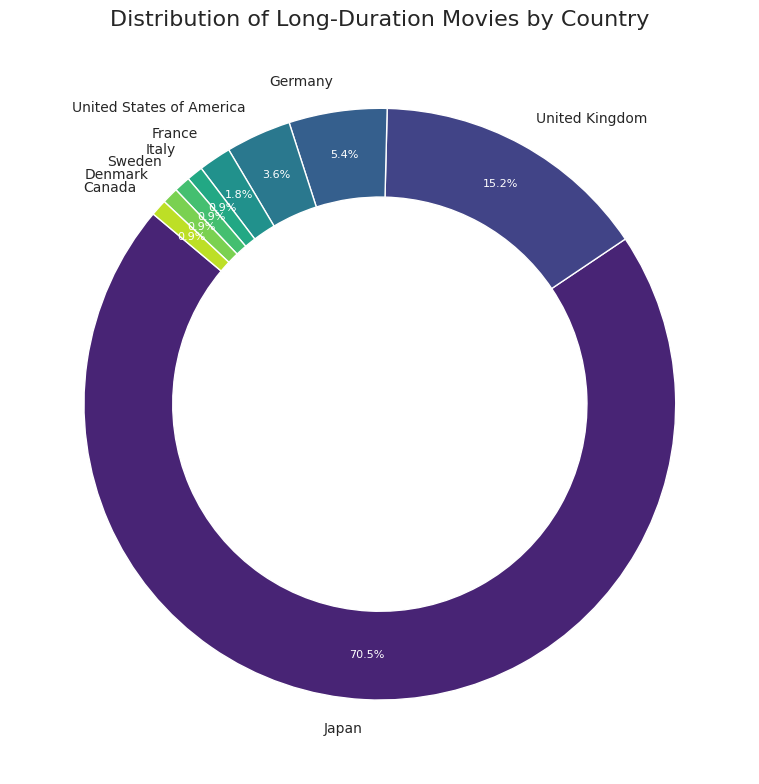

In [19]:
# Filtrare i film con durata maggiore di 500 minuti supponendo che siano serie TV
df_series = filtered_studios[filtered_studios['minute'] > 500]

# Unire con i paesi utilizzando 'film_id' come chiave
series_countries = pd.merge(
    df_series,
    df_countries_clean,  # Dataset sui paesi
    left_on='film_id',  # Colonna di join
    right_on='film_id',  # Colonna di join
    how='inner'  # Mantiene solo i dati che hanno corrispondenza
)

# Series
country_counts = series_countries['country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Grafico a torta con etichette ordinate per evitare sovrapposizioni
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    country_counts['Count'],
    labels=country_counts['Country'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('viridis', len(country_counts)),
    wedgeprops=dict(width=0.3),  # Effetto anello
    pctdistance=0.85  # Distanza delle percentuali dal centro
)

# Migliorare la leggibilità delle etichette
for text in texts:
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_fontsize(8)
    autotext.set_color('white')  # Numeri in contrasto

plt.title('Distribution of Long-Duration Movies by Country', fontsize=16)
plt.tight_layout()
plt.show()

Dal grafico a torta possiamo osservare:

- **Giappone:** Con il 75-80% dei contenuti, domina nettamente questa categoria. La sua produzione si concentra su serie animate o lunghe saghe, ben radicate nella cultura pop giapponese.
- **Regno Unito:** Al secondo posto, rappresenta circa il 10-15%, con serie TV e documentari di alta qualità.
- **Altri paesi (Germania, Francia, USA, etc.):** Mostrano una presenza ridotta, suggerendo una produzione più frammentata.

Una possibile anomalia riguarda gli Stati Uniti, che hanno un numero sorprendentemente basso di prodotti in questa categoria. Questo potrebbe essere dovuto a come i dati sono archiviati, poiché episodi di serie TV (es. *Black Mirror*) sono spesso classificati separatamente come "TV Movie".

**Vediamo adesso quali sono i generi di questi contenuti di lunga durata.**

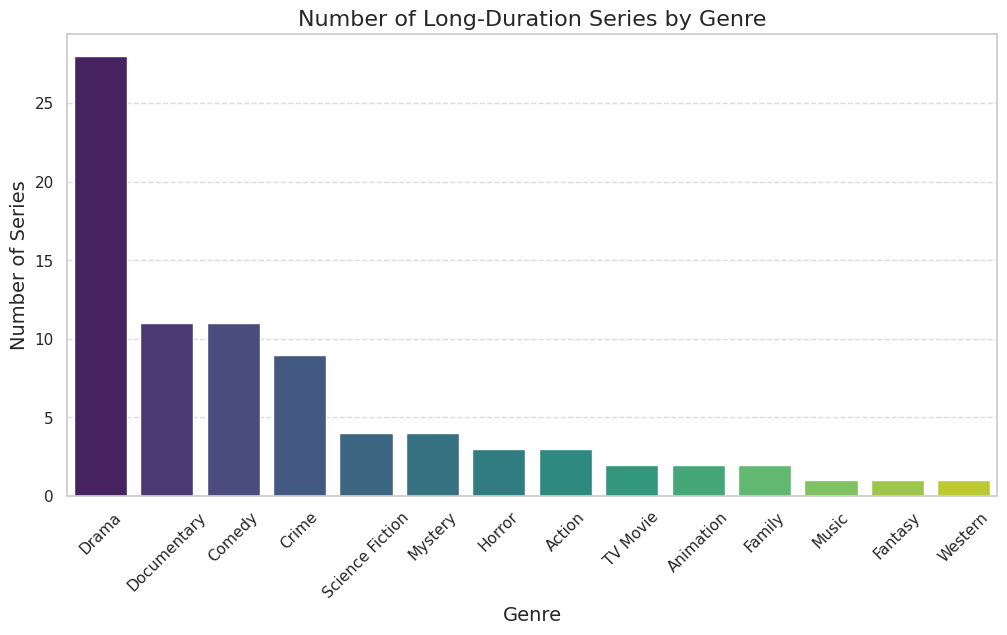

In [20]:
# Unire con i generi utilizzando 'film_id' come chiave
series_genres = pd.merge(
    df_series,
    df_genres_clean,  # Dataset sui generi
    left_on='film_id',
    right_on='film_id',
    how='inner'
)

# Contare i generi
genre_counts = series_genres['genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Grafico a barre per i generi
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_counts, x='Genre', y='Count', palette='viridis', hue='Genre', dodge=False)
plt.title('Number of Long-Duration Series by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Number of Series', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Si può notare come il **Drama** sia più che doppio rispetto al secondo e al terzo genere più rappresentato Questo può riflettere una preferenza culturale per racconti più profondi e con narrazioni più elaborate.

Ma quali paesi producono principalmente serie di lunga durata in ciascun genere? Ad esempio, il "Drama" è dominato dal Giappone o da un altro paese?


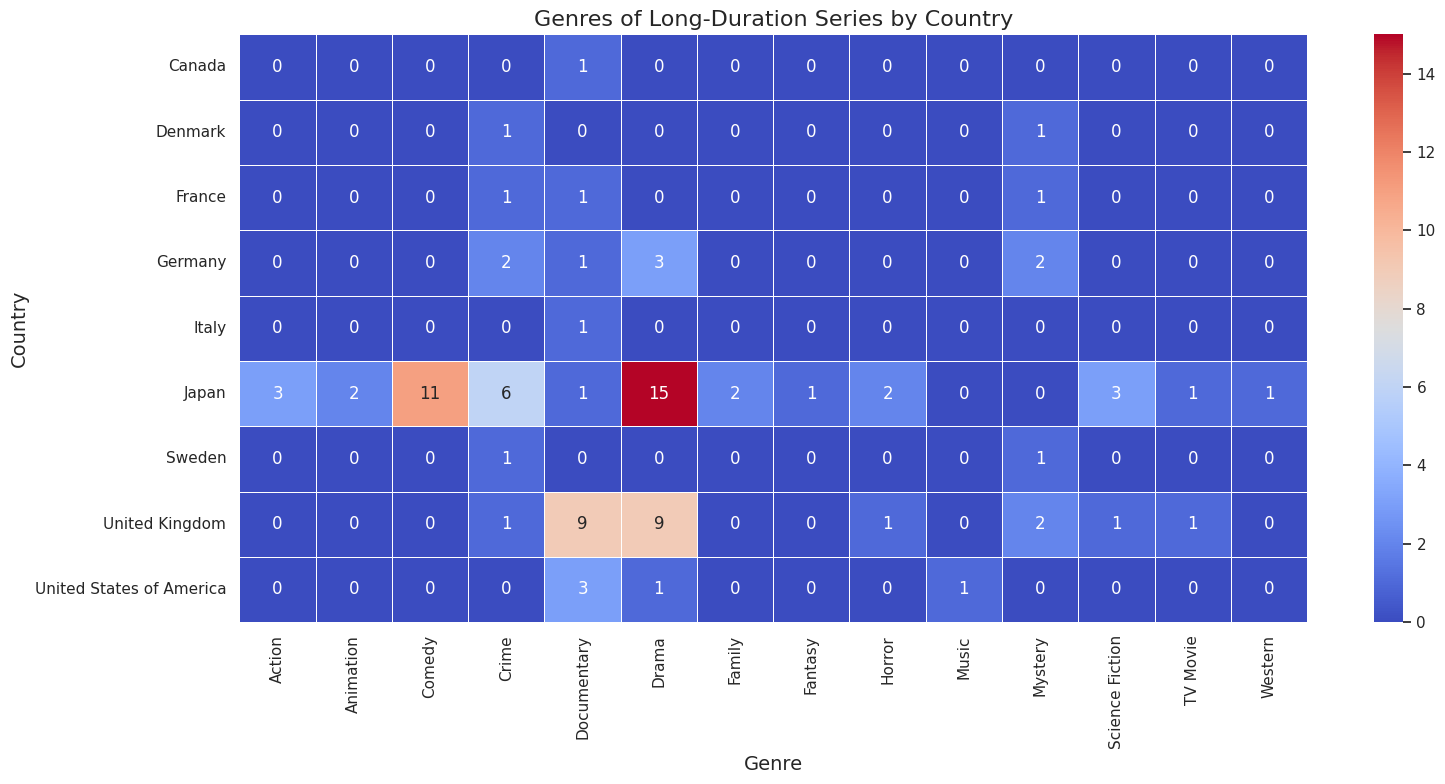

In [21]:
# Unire serie TV con paesi
series_genres_countries = pd.merge(
    series_genres,
    df_countries_clean,  # Dataset sui paesi
    on='film_id',
    how='inner'
)

# Contare i generi per paese
genre_country_counts = series_genres_countries.groupby(['country', 'genre']).size().reset_index(name='Count')

# Heatmap per visualizzare la distribuzione
genre_country_pivot = genre_country_counts.pivot(index='country', columns='genre', values='Count').fillna(0)

plt.figure(figsize=(16, 8))
sns.heatmap(
    genre_country_pivot,
    cmap='coolwarm',
    annot=True,
    fmt='.0f',
    linewidths=0.5
)
plt.title('Genres of Long-Duration Series by Country', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.tight_layout()
plt.show()

### Osservazioni
- Giappone: Domina nei generi come Drama, Science Fiction, e Action, indicando una forte predilezione per contenuti narrativi lunghi e di genere specifico. Questo riflette la cultura degli anime e dei film epici.
- Regno Unito: Si concentra maggiormente su Drama e Documentary, dimostrando un orientamento verso produzioni di alta qualità e culturalmente rilevanti.
- Germania e Francia: Si distinguono con una produzione bilanciata tra generi come Documentary e Drama.
- Stati Uniti: Mostrano meno varietà in questa specifica categoria, probabilmente a causa della registrazione individuale degli episodi nei dati.

**Sappiamo già che uno dei top_studios che producono principalmente in Giappone è la Toei Company, vediamo se oltre ad aver colto il luogo giusto e i temi giusti ha azzeccato anche i tempi giusti.**

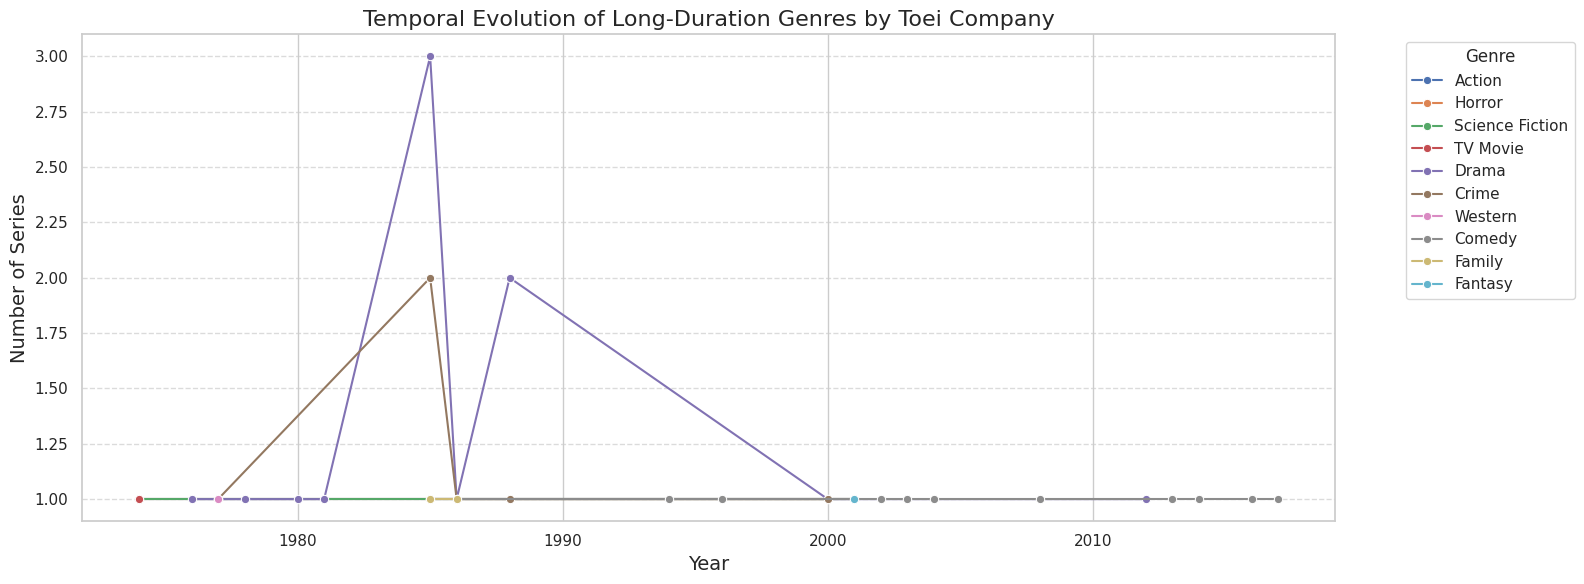

In [22]:
# Filtrare Toei Company
toei_series = series_genres[series_genres['studio'] == 'Toei Company']

# Contare il numero di serie per genere e anno
toei_genres_temporal = toei_series.groupby(['year', 'genre']).size().reset_index(name='count')

# Visualizzare con un lineplot
plt.figure(figsize=(16, 6))
sns.lineplot(
    data=toei_genres_temporal,
    x='year',
    y='count',
    hue='genre',
    marker='o'
)
plt.title('Temporal Evolution of Long-Duration Genres by Toei Company', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Series', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Dal grafico possiamo osservare che la **Toei Company** ha avuto il suo periodo di maggiore attività nella produzione di serie a lunga durata durante gli anni '80 e '90, un'epoca in cui hanno dominato con alcune delle loro produzioni più iconiche come Sailor Moon e altre serie di animazione celebri. Questo dimostra la loro capacità di intercettare il pubblico di quegli anni, offrendo narrazioni avvincenti e contenuti rilevanti per un mercato in espansione.

La concentrazione temporale sottolinea anche la strategia della **Toei Company** di focalizzarsi su un periodo specifico, probabilmente rispondendo a una crescente domanda di serie animate lunghe, una tendenza popolare negli anni '80 e '90 in Giappone e oltre.

## Conclusioni finali:

Dopo questa analisi possiamo affermare che il successo di uno studio cinematografico dipende dalla combinazione di diverse strategie, calibrate sul proprio pubblico e contesto:
1. **Studios americani**:
    - Puntano a un pubblico globale.
    - Producono film in grande quantità, spesso in una vasta gamma di generi e mercati.
    - Sebbene la qualità media sia generalmente più bassa rispetto ad altri studi, il dominio del mercato è assicurato dalla loro scala produttiva e dall'ampia diversificazione.
2. **Studios europei**:
    - Tendono a diversificare la produzione tra vari Paesi.
    - Si concentrano su generi specifici e di alta qualità, mirati a un pubblico più di nicchia e selettivo.
    - Esempi come BBC, ARTE e ZDF mostrano un forte impegno verso documentari e drammi storici.
3. **Studios giapponesi**:
    - Come la Toei Company, rispondono a un pubblico che apprezza narrazioni complesse, spesso con durate lunghe e trame elaborate.
    - Puntano su generi come l'animazione e il drama, che hanno risonanza globale.
    - Si sono adattati al contesto storico, sfruttando momenti chiave per produrre contenuti che sono rimasti rilevanti per decenni.


### Lezione chiave:
- La chiave del successo per uno studio cinematografico risiede nella **profonda conoscenza del proprio pubblico** e nella capacità di adattarsi a contesti storici e geografici.
- Alcuni studios trovano il successo concentrandosi sulla quantità, mentre altri eccellono attraverso la qualità e la specializzazione.
- La diversificazione geografica e di genere può essere una strategia vincente per studios con ambizioni globali, mentre un focus ristretto può portare al successo in mercati di nicchia.

Rispondendo alla domanda iniziale: **Quali fattori determinano il successo di uno studio cinematografico?**, possiamo concludere che il successo dipende da un delicato bilanciamento tra quantità, qualità, diversificazione e specializzazione, adattati al pubblico di riferimento e alle condizioni di mercato.